# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [8]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

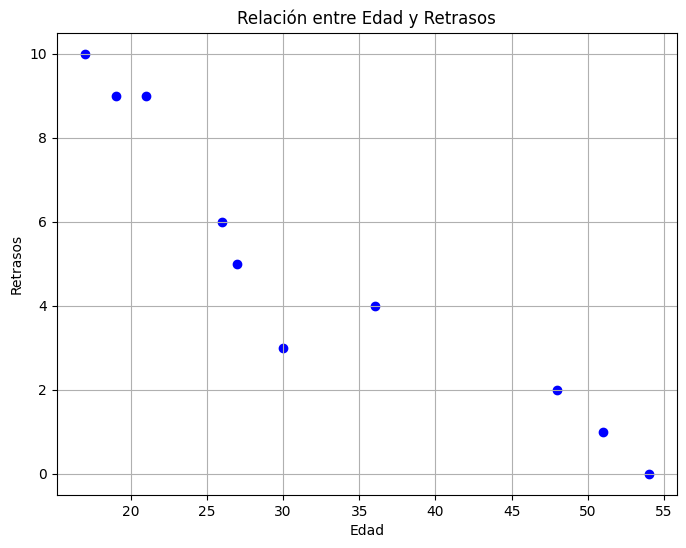

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='b', marker='o')
plt.title('Relación entre Edad y Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.grid(True)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Sí. Se observa que los puntos siguen una tendencia decreciente. En general, a mayor edad, menos retrasos acumulan. Y viceversa, como más jóvenes, más retrasos acumulan.

En consecuencia la covariancia de los datos será negativa, por lo que la pendiente de la recta de regresión también será negativa. El coeficiente de Pearson será negativo y cercano a -1.

La predicción a simple vista a partir del scatterplot es que la recta de regresión entre los retrasos (R) y la edad (E) tenga pendiente $m = \frac{0-9}{55-17} = \frac{-9}{38} = -0,2368$ y ordenada al origen de $ n = 9 + 0,2368·17 = 13,03 $ (partiendo de 9 retrasos en 17 años y iendo 17 veces la pendiente atrás arriba). Por lo tanto se espera un resultado de recta de regresión aproximada a $R = -0,2368 · E + 13,03 $

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [16]:
covariance = student_data[['Edad', 'Retrasos']].cov().iloc[0, 1]
print(f"Covarianza entre Edad y Retrasos: {covariance}")

correlation = student_data[['Edad', 'Retrasos']].corr().iloc[0, 1]
print(f"Correlación de Pearson entre Edad y Retrasos: {correlation}")

print("""
El signo negativo de la covariancia indica que cuando una variable crece, la otra decrece.
Eso sucede porque cuando (x-media de x) es negativo, (y-media de y) es positivo, y viceversa.
Así que la suma del producto (x-media de x) · (y-media de y), que es la covariancia, acaba siendo negativa.

Explicado en detalle concreto: es justamente lo que pasa ya que la media de x es {media_x}
por lo que todos los datos entre {min_x} y {media_x} al restarse con la media dan negativo.
En cambio, la media de y es {media_y} y en el intervalo donde x era negativa, la y es positiva ({min_y} y {media_y}).

El signo del coeficiente de Pearson siempre es igual que el de la covariancia ya que es justamente la covariancia dividido
el producto de las desviaciones típicas de x e y (que por definición son positivas).
Así que el coeficiente de Pearson es negativo, lo que indica que la correlación entre las variables es negativa (cuando una variable crece, la otra decrece).
Tienen una relación con pendiente negativa.
La magnitud (valor absoluto o módulo del coeficiente de Pearson) indica la fuerza de la correlación.
Dado que su módulo está muy cerca de 1 ({corr}), se trata de una correlación fuerte. Las variables están fuertemente correlacionadas.
""".format(
    media_x=student_data['Edad'].mean(),
    min_x=student_data['Edad'].min(),
    media_y=student_data['Retrasos'].mean(),
    min_y=student_data['Retrasos'].min(),
    corr=abs(correlation)
))

Covarianza entre Edad y Retrasos: -45.56666666666666
Correlación de Pearson entre Edad y Retrasos: -0.9391626886887121

El signo negativo de la covariancia indica que cuando una variable crece, la otra decrece.
Eso sucede porque cuando (x-media de x) es negativo, (y-media de y) es positivo, y viceversa.
Así que la suma del producto (x-media de x) · (y-media de y), que es la covariancia, acaba siendo negativa.

Explicado en detalle concreto: es justamente lo que pasa ya que la media de x es 32.9 
por lo que todos los datos entre 17 y 32.9 al restarse con la media dan negativo. 
En cambio, la media de y es 4.9 y en el intervalo donde x era negativa, la y es positiva (0 y 4.9).

El signo del coeficiente de Pearson siempre es igual que el de la covariancia ya que es justamente la covariancia dividido
el producto de las desviaciones típicas de x e y (que por definición son positivas).
Así que el coeficiente de Pearson es negativo, lo que indica que la correlación entre las variables es nega

**Covariancia**
$$ Cov(X,Y) = \frac{1}{n} \sum (x_i - \mu_X)*(y_i - \mu_Y), $$

donde $n$ es la longitud de las dos series, $\mu_X$ la media de $x$, $\mu_Y$ la media de $y$.

**Correlación de Pearson**
$$ R = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

donde $\sigma_X$ es la desviación típica de $x$, $\sigma_Y$ es la desviación típica de $y$

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(student_data[['Edad']], student_data[['Retrasos']])

# Print regresion
print("R = ", lm.coef_[0][0], "· E + ", lm.intercept_[0])

# Print coments
print("\nLa variable resultado es la cantidad de retrasos (R). Usamos regresión lineal de los datos ya que en el scatterplot se observó una tendencia lineal.")

R =  -0.2428207709159809 · E +  12.888803363135771

La variable resultado es la cantidad de retrasos (R). Usamos regresión lineal de los datos ya que en el scatterplot se observó una tendencia lineal.


Grafica tu modelo de regresión en tu diagrama de dispersión.

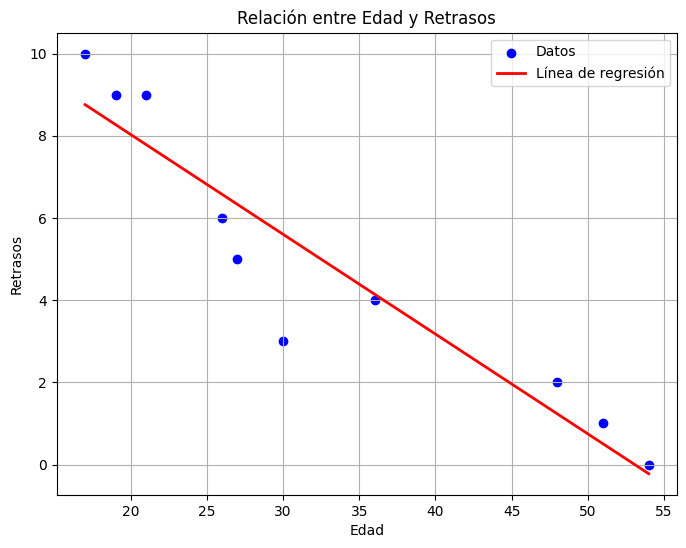

In [33]:
# Valores para la línea de regresión
x_values = np.linspace(student_data['Edad'].min(), student_data['Edad'].max(), 2)
y_values = lm.intercept_[0] + lm.coef_[0][0] * x_values

# Gráfico scatter con la regressión
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='b', marker='o', label='Datos')
plt.plot(x_values, y_values, color='r', linestyle='-', linewidth=2, label='Línea de regresión')
plt.title('Relación entre Edad y Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [48]:
# Resultados
pendiente_estimada = -0.2368
pendiente_real = -0.2428
ordenada_estimada = 13.03
ordenada_real = 12.89

print(f"La predicción a ojo con el scatterplot era la siguiente dependencia: R = {pendiente_estimada} · E + {ordenada_estimada} ")
print(f"El modelo lineal nos ha dado la siguiente dependencia:  R = {pendiente_real} · E + {ordenada_real}")
print(f"\nPodemos decir que el resultado es aproximadamente el esperado. Con un error absoluto de {abs(pendiente_real - pendiente_estimada):.4f} en la pendiente y de {abs(ordenada_real - ordenada_estimada):.2f} en la ordenada.")
print(f"Eso representa un error relativo de {100*abs(pendiente_real - pendiente_estimada)/abs(pendiente_real):.0f}% en la pendiente y de {100*abs(ordenada_real - ordenada_estimada)/abs(ordenada_real):.0f}% en la ordenada.")
print(f"\nPodemos afirmar que la edad está fuertemente correlacionada con el número de retrasos ya que eso nos lo indica {correlation:.4f} cercano a -1. La dependencia lineal es bastante consistente en el conjunto de datos analizado.")
print(f"A pesar de esta fuerte relación entre edad y retrasos, esto no significa que la edad cause directamente menos retrasos. Correlación no implica causalidad. Otros factores podrían estar influyendo en esta relación.")
print("La alta magnitud de ( R ) sugiere que, dentro del dataset, la edad podría servir como un predictor razonable del número de retrasos.")
print("Sin embargo, es recomendable validar este modelo con datos adicionales o más contextos para observar si la relación se mantiene consistente.")

La predicción a ojo con el scatterplot era la siguiente dependencia: R = -0.2368 · E + 13.03 
El modelo lineal nos ha dadola siguiente dependencia:  R = -0.2428 · E + 12.89

Podemos decir que el resultado es aproximadamente el esperado. Con un error absoluto de 0.0060 en la pendiente y de 0.14 en la ordenada.
Eso representa un error relativo de 2% en la pendiente y de 1% en la ordenada.

Podemos afirmar que la edad está fuertemente correlacionada con el número de retrasos ya que eso nos lo indica -0.9392 cercano a -1. La dependencia lineal es bastante consistente en el conjunto de datos analizado.
A pesar de esta fuerte relación entre edad y retrasos, esto no significa que la edad cause directamente menos retrasos. Correlación no implica causalidad. Otros factores podrían estar influyendo en esta relación.
La alta magnitud de ( R ) sugiere que, dentro del dataset, la edad podría servir como un predictor razonable del número de retrasos.
Sin embargo, es recomendable validar este modelo 

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
ruta_principal = "/content/drive/MyDrive/IronHack/"
vehicles = pd.read_csv(ruta_principal + "vehicles.csv")

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [51]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

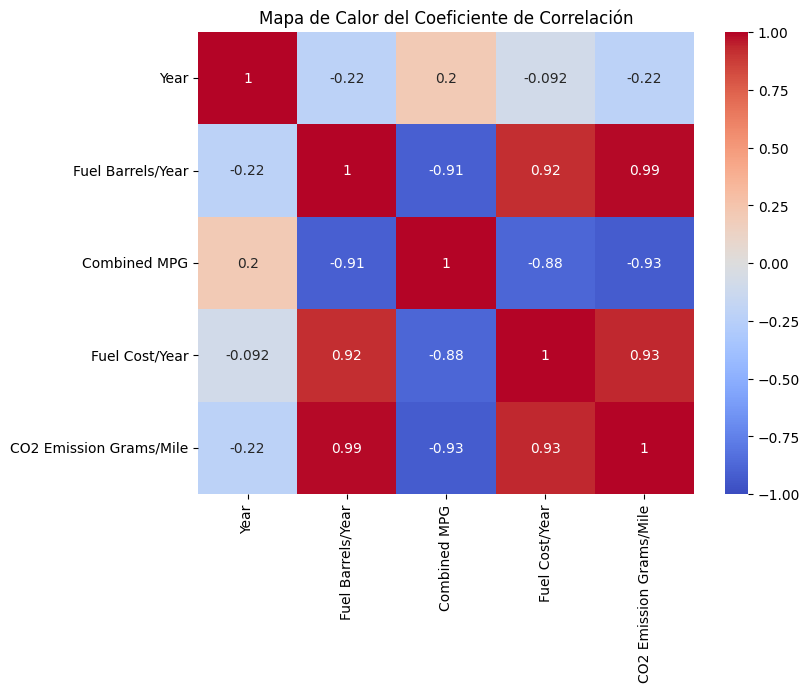

La variable más importante para determinar las emisiones de CO2 es la cantidad de barriles consumidos por año (R=0.99).
Ya que hay una relación directa entre la cantidad que se consume de fuel con el CO2 que libera ese fuel.

La variable que proporciona la menor cantidad de información útil para determinar las emisiones de CO2 es el año (R=-0.22)
Ya que hay otras variables más correlacionadas con el CO2 que el paso anual.


In [59]:
columns_used = ['Year', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

correlation_matrix = vehicles[columns_used].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor del Coeficiente de Correlación')
plt.show()

print("La variable más importante para determinar las emisiones de CO2 es la cantidad de barriles consumidos por año (R=0.99).")
print("Ya que hay una relación directa entre la cantidad que se consume de fuel con el CO2 que libera ese fuel.")
print("\nLa variable que proporciona la menor cantidad de información útil para determinar las emisiones de CO2 es el año (R=-0.22)")
print("Ya que hay otras variables más correlacionadas con el CO2 que el paso anual.")

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

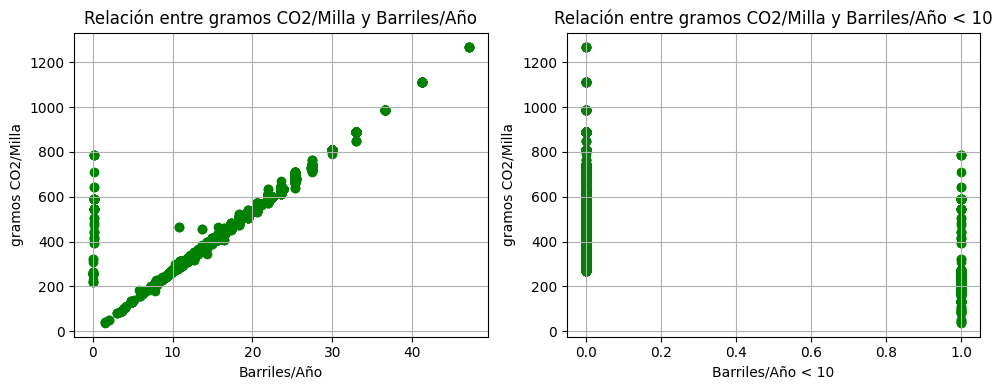

Se eliminan los puntos intrusos con barriles/año <= 1.


In [81]:
# Se puede hacer un modelo lineal con la única variable de Fuel Barrels/Year
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Scatterplot
axes[0].scatter(vehicles['Fuel Barrels/Year'], vehicles['CO2 Emission Grams/Mile'], color='g', marker='o')
axes[0].set_title('Relación entre gramos CO2/Milla y Barriles/Año')
axes[0].set_xlabel('Barriles/Año')
axes[0].set_ylabel('gramos CO2/Milla')
axes[0].grid(True)

# Scatterplot para Fuel Barrels/Year < 10
axes[1].scatter(vehicles['Fuel Barrels/Year'] < 10, vehicles['CO2 Emission Grams/Mile'], color='g', marker='o')
axes[1].set_title('Relación entre gramos CO2/Milla y Barriles/Año < 10')
axes[1].set_xlabel('Barriles/Año < 10')
axes[1].set_ylabel('gramos CO2/Milla')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("Se eliminan los puntos intrusos con barriles/año <= 1.")
vehicles_filtered = vehicles[vehicles['Fuel Barrels/Year']>=1]

In [82]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(vehicles_filtered[['Fuel Barrels/Year']], vehicles_filtered[['CO2 Emission Grams/Mile']])

# Print regresion
print("y = ", lm.coef_[0][0], "· x + ", lm.intercept_[0])
print('Siendo "y" los gramos de CO2 por milla liberados y "x" los barriles por año.')

y =  26.943570316616324 · x +  0.11178074912896818
Siendo "y" los gramos de CO2 por milla liberados y "x" los barriles por año.


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [85]:
# Resultados
pendiente_estimada = (1100-0)/(40-0)
pendiente_real = 26.94
ordenada_estimada = 0
ordenada_real = 0.1118

print(f"La predicción a ojo con el scatterplot era la siguiente dependencia: y = {pendiente_estimada} · x + {ordenada_estimada} ")
print(f"El modelo lineal nos ha dado la siguiente dependencia:  y = {pendiente_real} · x + {ordenada_real}")
print(f"\nPodemos decir que el resultado es aproximadamente el esperado. Con un error absoluto de {abs(pendiente_real - pendiente_estimada):.2f} en la pendiente y de {abs(ordenada_real - ordenada_estimada):.4f} en la ordenada.")
print(f"Eso representa un error relativo de {100*abs(pendiente_real - pendiente_estimada)/abs(pendiente_real):.0f}% en la pendiente y de {100*abs(ordenada_real - ordenada_estimada)/abs(ordenada_real):.0f}% en la ordenada.")
print(f"\nPodemos afirmar que la edad está fuertemente correlacionada con el número de retrasos ya que eso nos lo indica {correlation:.4f} cercano a -1. La dependencia lineal es bastante consistente en el conjunto de datos analizado.")
print(f"A pesar de esta fuerte relación entre gramos de CO2 por milla liberados y los barriles por año, esto no significa que la edad cause directamente menos retrasos. Correlación no implica causalidad. Otros factores podrían estar influyendo en esta relación.")
print("La alta magnitud de ( y ) sugiere que, dentro del dataset, el número de barriles por año podrían servir como un predictor razonable de los gramos de CO2 liberados por milla.")
print("Sin embargo, es recomendable validar este modelo con datos adicionales o más contextos para observar si la relación se mantiene consistente.")

La predicción a ojo con el scatterplot era la siguiente dependencia: y = 27.5 · x + 0 
El modelo lineal nos ha dado la siguiente dependencia:  y = 26.94 · x + 0.1118

Podemos decir que el resultado es aproximadamente el esperado. Con un error absoluto de 0.56 en la pendiente y de 0.1118 en la ordenada.
Eso representa un error relativo de 2% en la pendiente y de 100% en la ordenada.

Podemos afirmar que la edad está fuertemente correlacionada con el número de retrasos ya que eso nos lo indica -0.9392 cercano a -1. La dependencia lineal es bastante consistente en el conjunto de datos analizado.
A pesar de esta fuerte relación entre gramos de CO2 por milla liberados y los barriles por año, esto no significa que la edad cause directamente menos retrasos. Correlación no implica causalidad. Otros factores podrían estar influyendo en esta relación.
La alta magnitud de ( y ) sugiere que, dentro del dataset, el número de barriles por año podrían servir como un predictor razonable de los gramos 

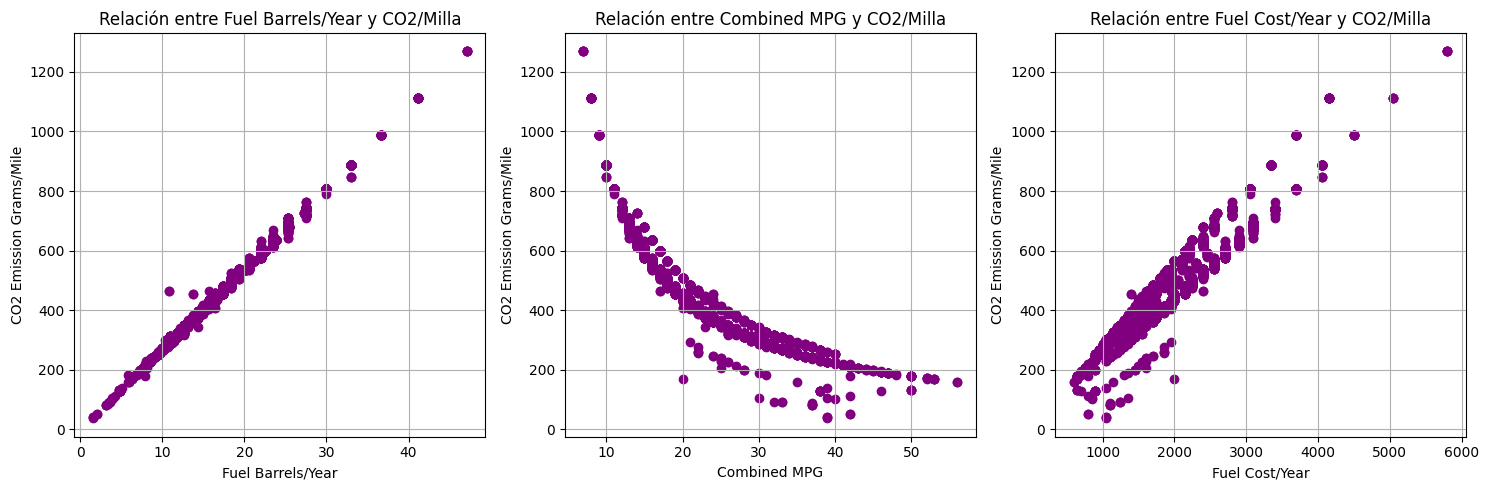

El modelo lineal se podría hacer con Fuel Barrels/Year y Fuel Cost/Year. Ya que para Combined MPG seguramente haría falta un ajuste polinómico de 2o grado.


In [88]:
# También se podría hacer un modelo lineal con alguna de las tres variables que tienen fuerte correlación: 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'
columns = ['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

# Crear una figura con tres subgráficas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterar sobre cada par de columnas y subgráficas
for ax, col in zip(axes, columns):
    ax.scatter(vehicles_filtered[col], vehicles_filtered['CO2 Emission Grams/Mile'], color='purple', marker='o')
    ax.set_title(f'Relación entre {col} y CO2/Milla')
    ax.set_xlabel(col)
    ax.set_ylabel('CO2 Emission Grams/Mile')
    ax.grid(True)

plt.tight_layout()
plt.show()

print("El modelo lineal se podría hacer con Fuel Barrels/Year y Fuel Cost/Year. Ya que para Combined MPG seguramente haría falta un ajuste polinómico de 2o grado.")
print("El ajuste con Fuel Barrels/Year fue la mejor opción lineal.")

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [ ]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*